# Niagara Credit Service Problem

## Data Analysis

In [29]:
# Basic imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Importing train file
train_credit_data = pd.read_csv('C:/Users/rushi/Desktop/DataScience/Problems/Niagara Credit Card Problem/Data/train.csv',index_col='CustNo')
train_credit_data.head()

,Default,Income,ForeignSpend,Tenure,Country,CashInd,Balance,PayAge,PersCardsNo,ReturnAge,...,BizCardsNo,Inquiries,TotalPayBal,BureauScore,CourtNo,BankScore,Utilization,ExtBal,Utilization2,CustProfile
CustNo,,,,,,,,,,,,,,,,,,,,,
1,0,-0.06,-0.545,-0.853,IN,7.817,-0.252,-0.351,-0.006,0.11,...,.,0.401,-0.048,-1.298,.,-0.818,-0.367,.,.,D
2,0,-0.047,-0.287,-0.627,IN,-0.128,0.350,-0.590,-0.006,0.11,...,.,0.401,-0.029,-1.155,.,-0.609,-0.367,-0.244,.,G
3,0,-0.03,-0.373,-0.643,IN,-0.128,0.599,2.274,-0.006,0.11,...,.,-0.580,-0.048,0.558,.,1.049,-0.367,-0.015,-1.141,E
4,0,-0.033,2.589,-0.934,IN,-0.128,-0.032,-0.232,-0.006,0.11,...,.,0.401,-0.048,0.375,.,-0.294,-0.367,.,.,D
5,0,-0.031,-0.545,0.069,IN,-0.128,-0.287,1.200,-0.006,0.11,...,.,1.381,-0.048,-1.56,.,0.264,-0.367,-0.16,-1.025,G


In [6]:
train_credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1 to 50000
Data columns (total 22 columns):
Default         50000 non-null int64
Income          50000 non-null object
ForeignSpend    50000 non-null float64
Tenure          50000 non-null float64
Country         50000 non-null object
CashInd         50000 non-null float64
Balance         50000 non-null float64
PayAge          50000 non-null float64
PersCardsNo     50000 non-null object
ReturnAge       50000 non-null float64
AcqRisk         50000 non-null object
RiskyInd        50000 non-null float64
BizCardsNo      50000 non-null object
Inquiries       50000 non-null float64
TotalPayBal     50000 non-null float64
BureauScore     50000 non-null object
CourtNo         50000 non-null object
BankScore       50000 non-null object
Utilization     50000 non-null object
ExtBal          50000 non-null object
Utilization2    50000 non-null object
CustProfile     50000 non-null object
dtypes: float64(9), int64(1), object(12)
memory

In [23]:
numeric_cols = train_credit_data.select_dtypes(include=[np.number]).columns
print(numeric_cols)
categorical_cols = list(train_credit_data.select_dtypes(exclude=[np.number]).columns)
print(categorical_cols)
categorical_cols.remove('Country')
categorical_cols.remove('CustProfile')
print(categorical_cols)

Index(['Default', 'ForeignSpend', 'Tenure', 'CashInd', 'Balance', 'PayAge',
       'ReturnAge', 'RiskyInd', 'Inquiries', 'TotalPayBal'],
      dtype='object')
['Income', 'Country', 'PersCardsNo', 'AcqRisk', 'BizCardsNo', 'BureauScore', 'CourtNo', 'BankScore', 'Utilization', 'ExtBal', 'Utilization2', 'CustProfile']
['Income', 'PersCardsNo', 'AcqRisk', 'BizCardsNo', 'BureauScore', 'CourtNo', 'BankScore', 'Utilization', 'ExtBal', 'Utilization2']


In [27]:
train_credit_data[categorical_cols] = train_credit_data[categorical_cols].apply(pd.to_numeric,errors='coerce')

In [28]:
train_credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1 to 50000
Data columns (total 22 columns):
Default         50000 non-null int64
Income          44420 non-null float64
ForeignSpend    50000 non-null float64
Tenure          50000 non-null float64
Country         50000 non-null object
CashInd         50000 non-null float64
Balance         50000 non-null float64
PayAge          50000 non-null float64
PersCardsNo     49522 non-null float64
ReturnAge       50000 non-null float64
AcqRisk         24103 non-null float64
RiskyInd        50000 non-null float64
BizCardsNo      2226 non-null float64
Inquiries       50000 non-null float64
TotalPayBal     50000 non-null float64
BureauScore     49124 non-null float64
CourtNo         2685 non-null float64
BankScore       48331 non-null float64
Utilization     49308 non-null float64
ExtBal          37008 non-null float64
Utilization2    13778 non-null float64
CustProfile     50000 non-null object
dtypes: float64(19), int64(1), object(2

In [37]:
train_credit_data.isnull().sum(axis=0).sort_values(ascending=False) / train_credit_data.index.size

BizCardsNo      0.95548
CourtNo         0.94630
Utilization2    0.72444
AcqRisk         0.51794
ExtBal          0.25984
Income          0.11160
BankScore       0.03338
BureauScore     0.01752
Utilization     0.01384
PersCardsNo     0.00956
Balance         0.00000
ForeignSpend    0.00000
Tenure          0.00000
Country         0.00000
CashInd         0.00000
CustProfile     0.00000
PayAge          0.00000
ReturnAge       0.00000
RiskyInd        0.00000
Inquiries       0.00000
TotalPayBal     0.00000
Default         0.00000
dtype: float64

In [47]:
train_credit_data['BizCardsNo'].unique()

array([    nan,  -1.245,   0.58 ,   2.405,   6.054,   4.229,  11.528])

In [48]:
notNullBizCardData = train_credit_data[~train_credit_data['BizCardsNo'].isnull() ]

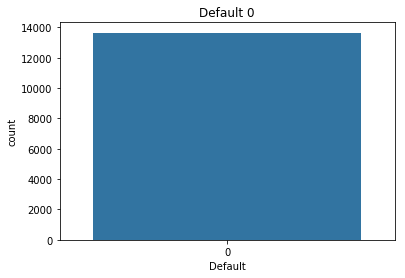

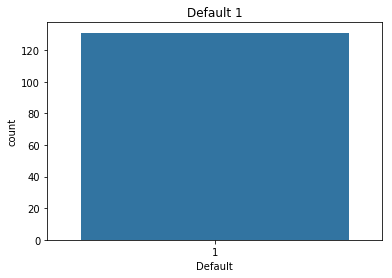

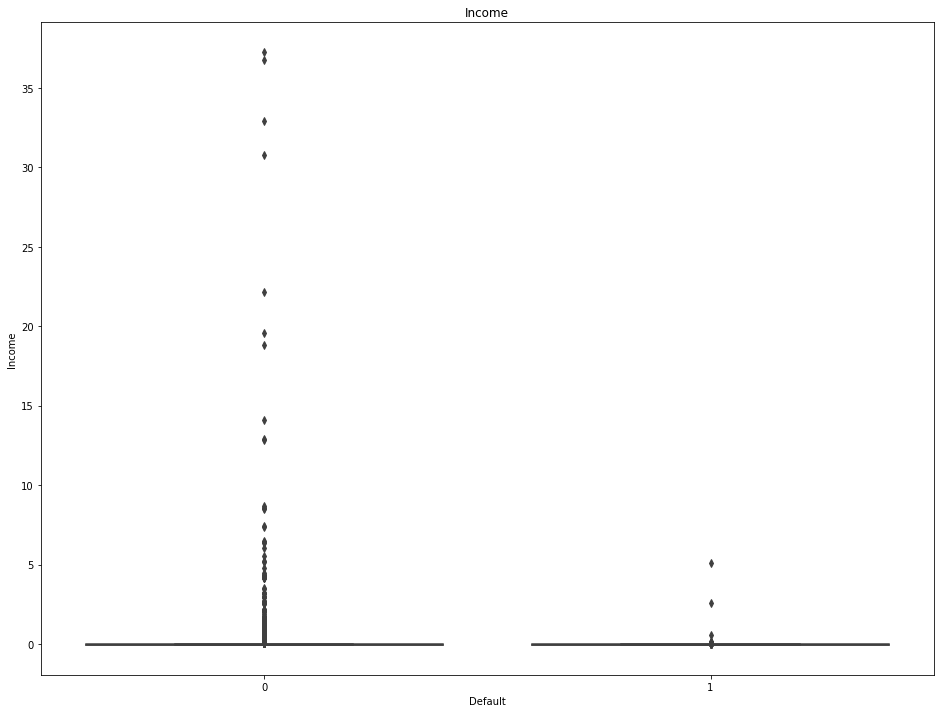

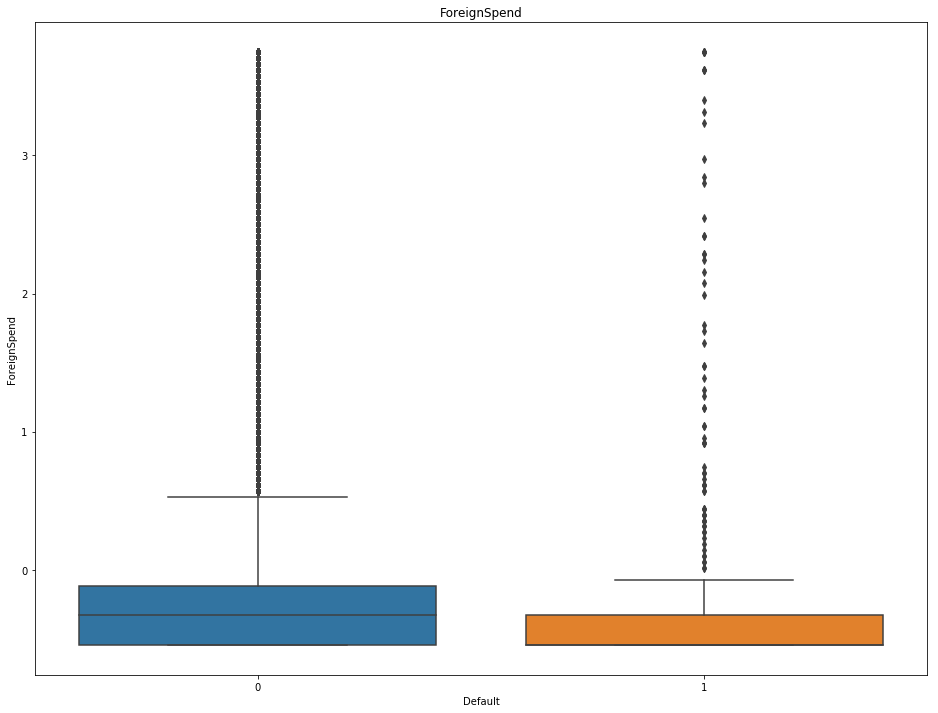

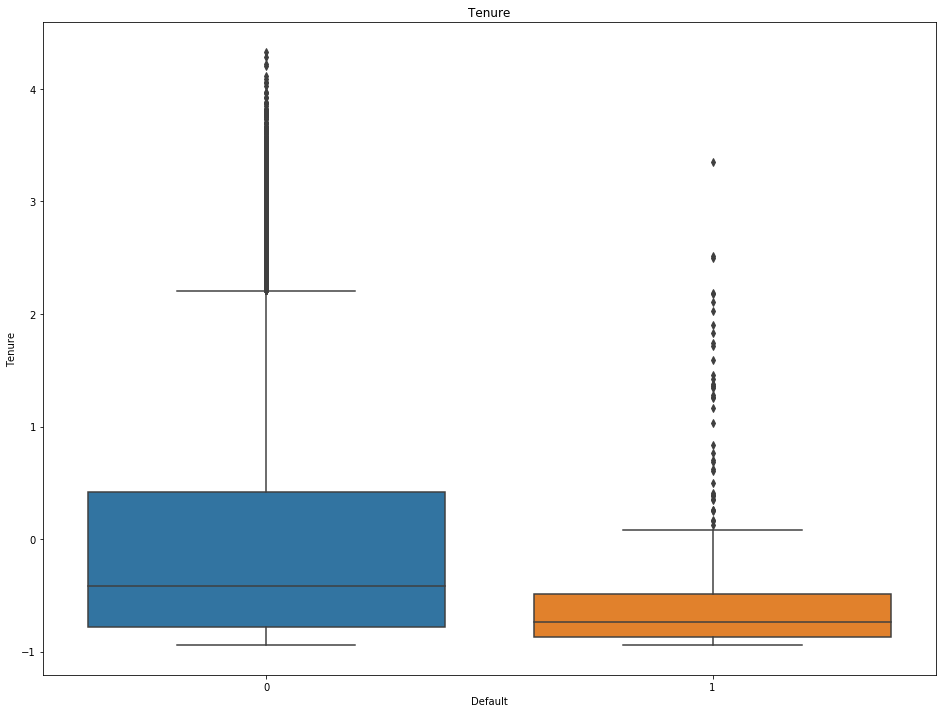

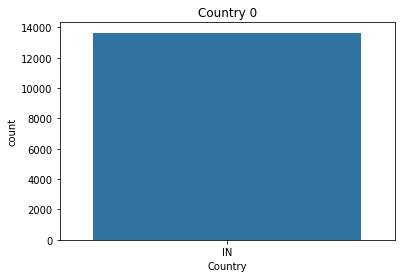

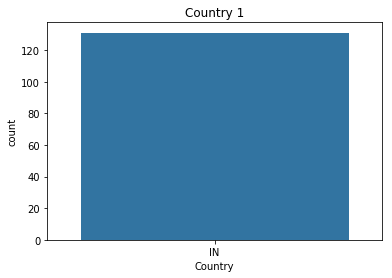

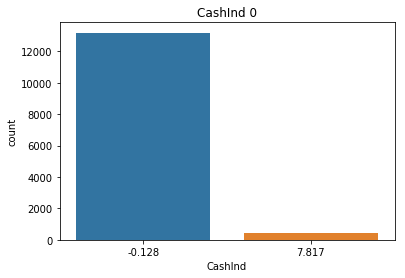

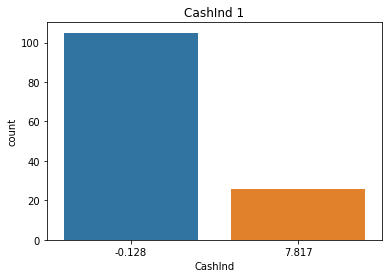

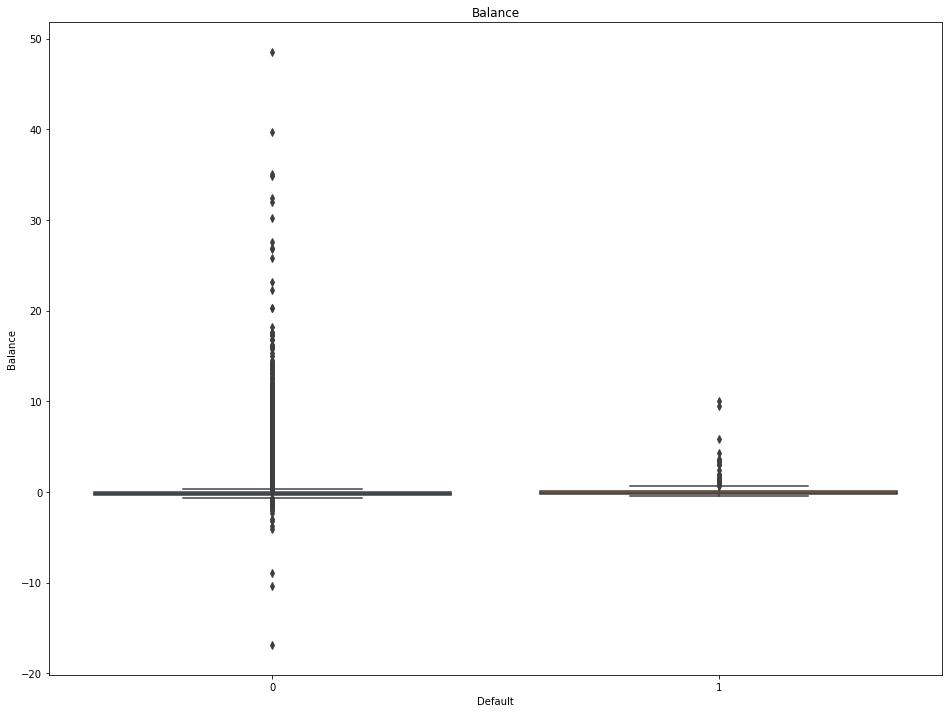

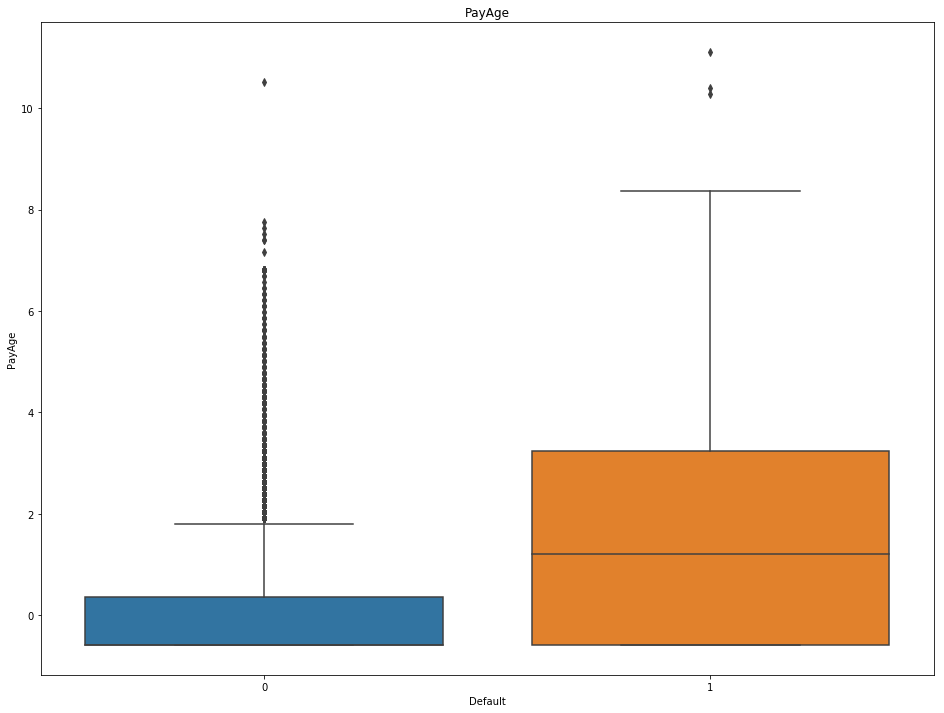

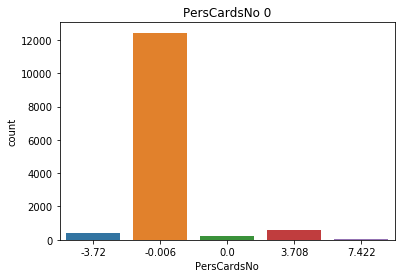

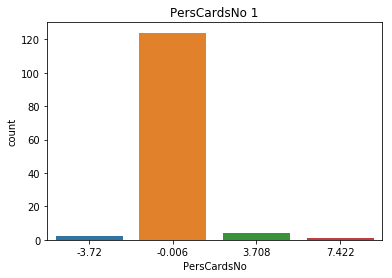

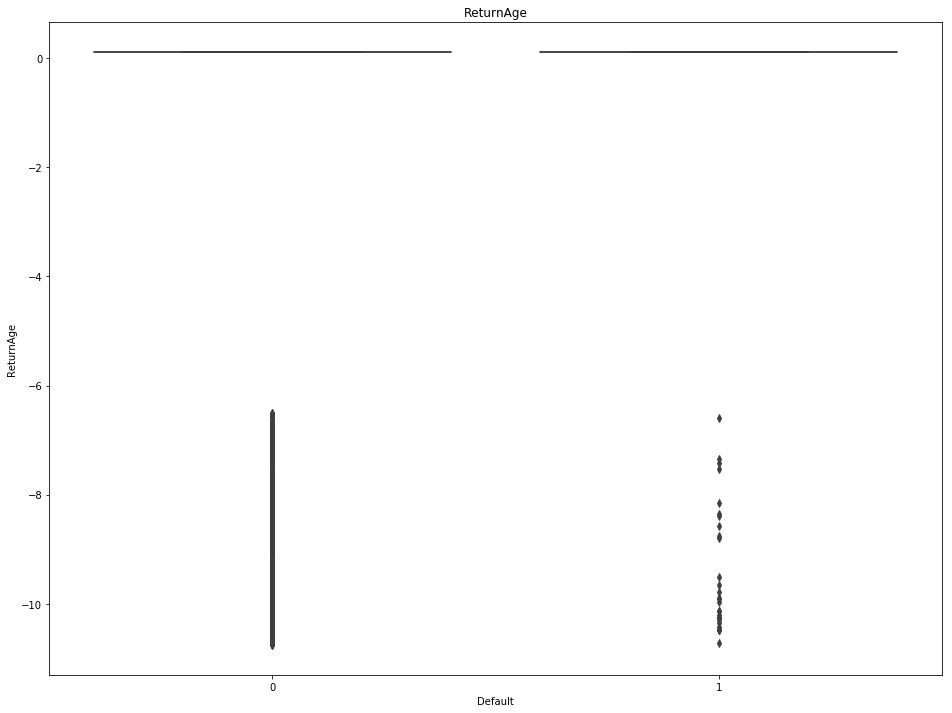

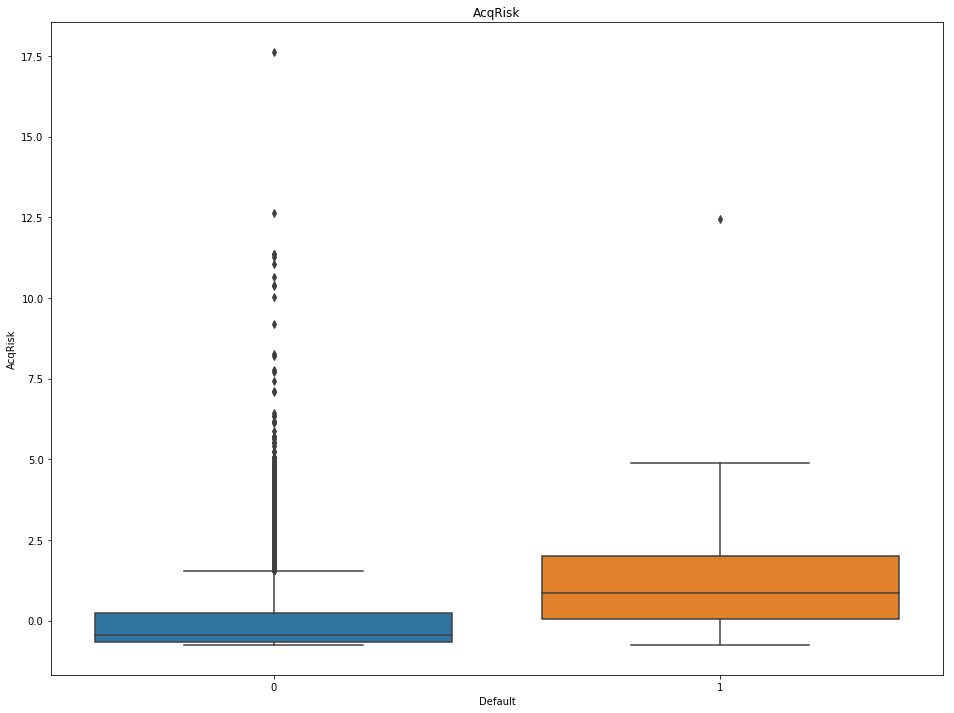

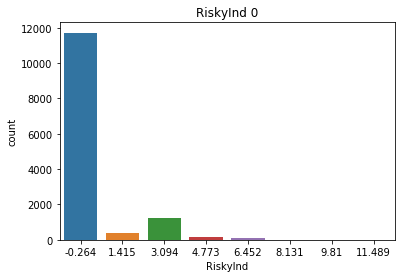

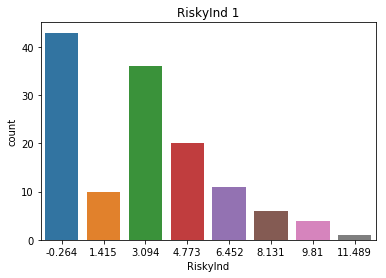

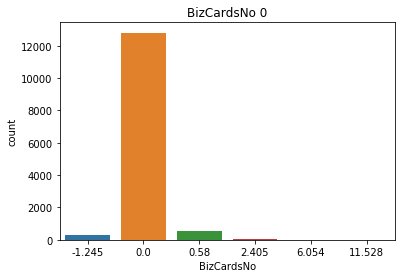

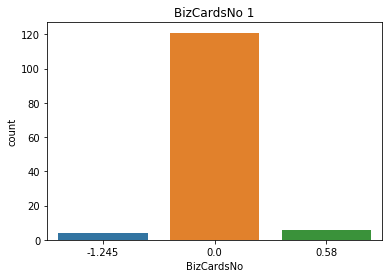

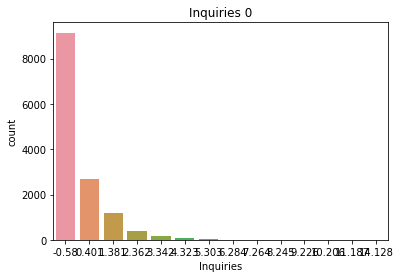

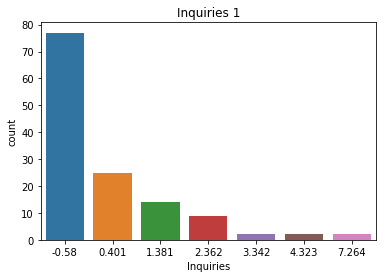

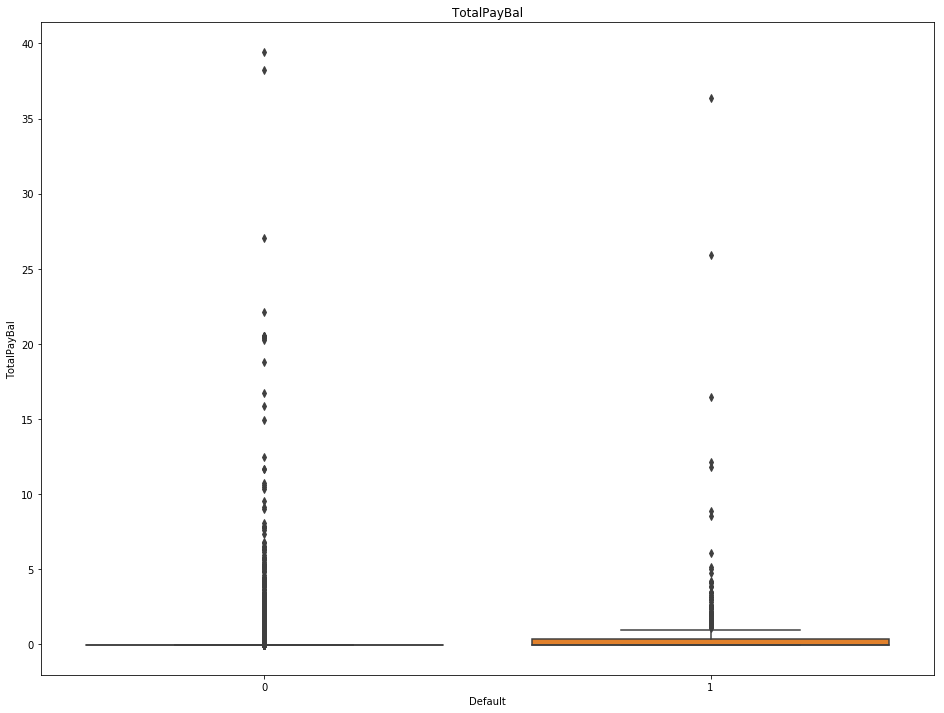

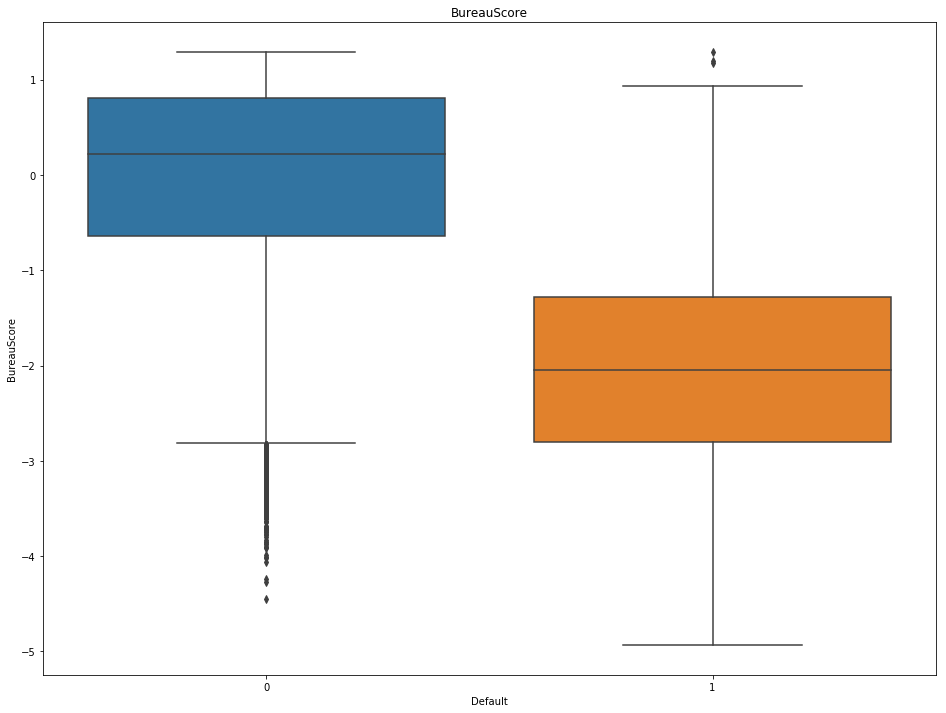

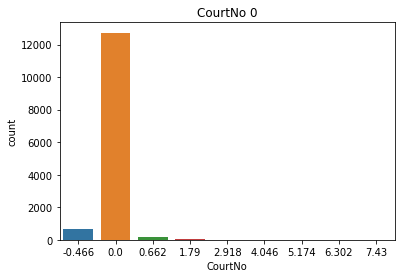

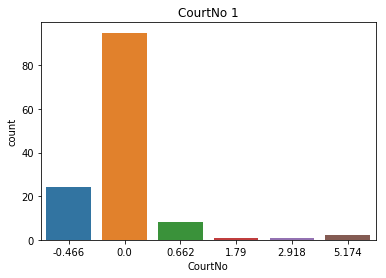

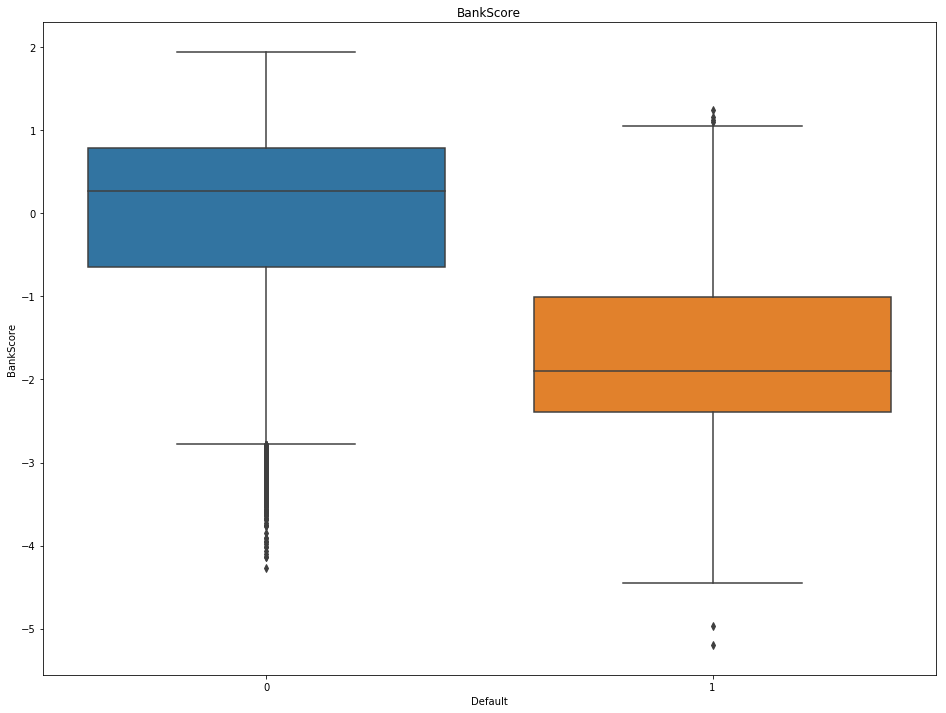

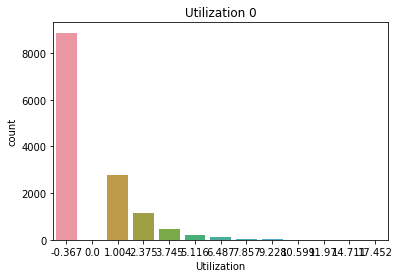

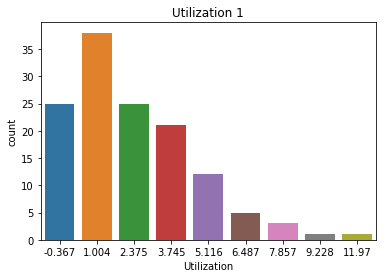

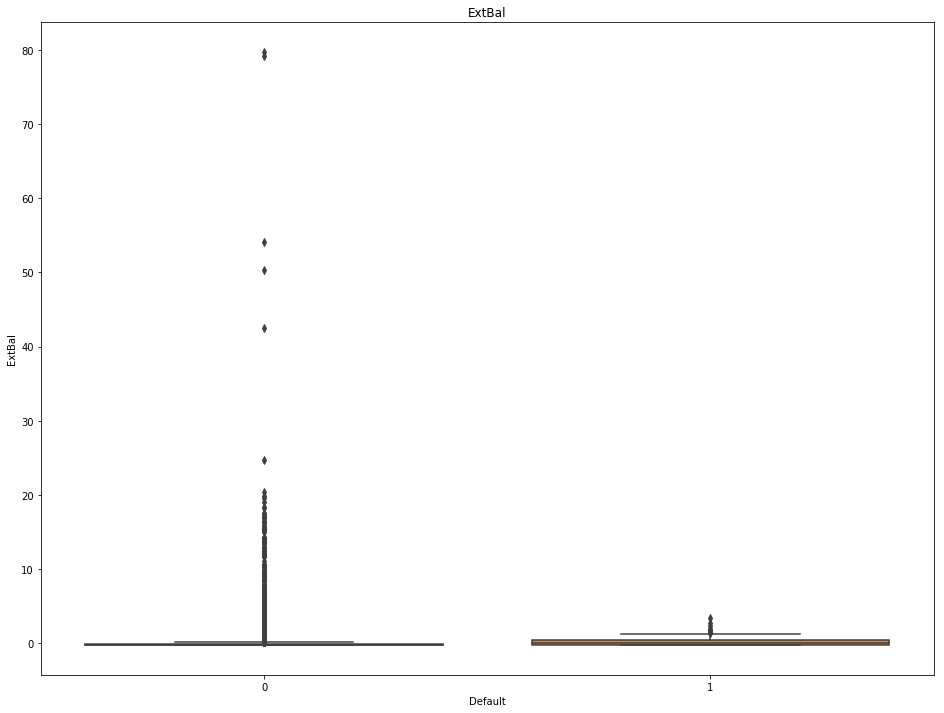

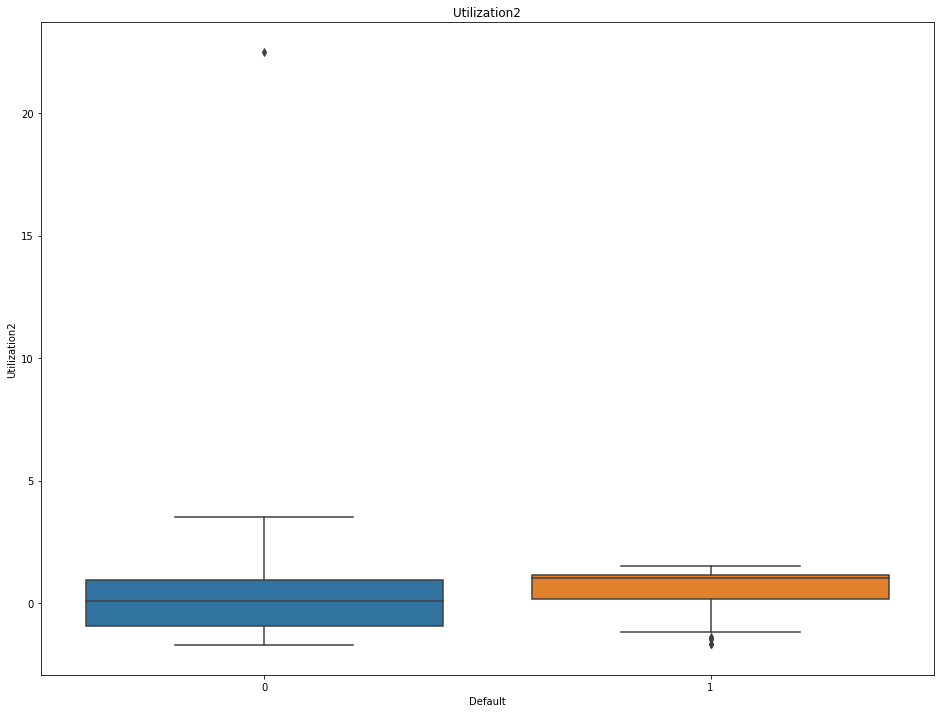

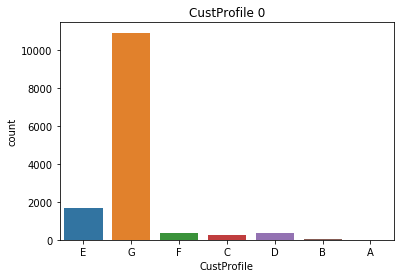

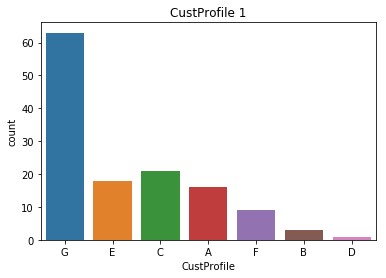

In [104]:
for col in list(train_credit_data.columns):
    notNullReturnAge = train_credit_data[~train_credit_data[col].isnull() ]
    if notNullReturnAge[col].unique().size > 20:
        plt.figure(figsize=(16,12))
        ax = sns.boxplot(y = notNullReturnAge[col],x=notNullReturnAge.Default)
        plt.title(col)
        plt.show()
    else:
        ax = sns.countplot( notNullCourtNo[notNullCourtNo['Default'] == 0][col].fillna(0))
        plt.title(col +' 0')
        plt.show()
        ax = sns.countplot( notNullCourtNo[notNullCourtNo['Default'] == 1][col].fillna(0))
        plt.title(col +' 1')
        plt.show()
        

In [94]:
for col in list(train_credit_data.columns):
    print(col)

Default
Income
ForeignSpend
Tenure
Country
CashInd
Balance
PayAge
PersCardsNo
ReturnAge
AcqRisk
RiskyInd
BizCardsNo
Inquiries
TotalPayBal
BureauScore
CourtNo
BankScore
Utilization
ExtBal
Utilization2
CustProfile
